In [12]:
# Import data 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
import skimpy as sk
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# import cvs file
df = pd.read_csv('/Users/albertooutumurobueno/Desktop/NUCLIO DIGITAL SCHOOL/CAPSTONE PROJECT/Clustering/Donna/merged_all_three_cleaned.csv', index_col=0)



## Clustering

**Step 1: Preparing the Data and slecting the number of clusters**

- To identify groups of customers that behave in similar ways, we can use the K-Modes algorithm to group the customers according to their behaviour patterns. As the data is categorical data, the K-Modes algorithm is better option to group the customers according to their behaviour patterns.

In [13]:
# Overview of data 
sk.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 5961978 │ │ bool        │ 66    │                                                         │
│ │ Number of columns │ 73      │ │ string      │ 4     │                                                         │
│ └───────────────────┴─────────┘ │ int64       │ 3     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA ┃ NA % ┃ mean    ┃ sd     ┃ p0    ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ pk_cid             │  0 │    0 │ 1200000 │ 160000 │ 16000 │ 1100000 │ 1200000 │ 1400000 │ 1600000 │    ▁▇▆ │  │
│ │ deceased           │  0 │    0 │ 2.2e-05 │ 0.0047 │     0 │       0 │       0 │       0 │       1 │   ▇    │  │
│ │ New Monthly        │  0 │    0 │   0.025 │   0.15 │     0 │       0 │       0 │       0 │       1 │   ▇    │  │
│ │ Subscribers        │    │      │         │        │       │         │         │         │         │        │  │
│ └────────────────────┴────┴──────┴─────────┴────────┴───────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                                   ┃ true              ┃ true rate             ┃ hist           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩  │
│ │ loans                                         │               468 │               7.8e-05 │       ▇        │  │
│ │ mortgage                                      │               324 │               5.4e-05 │       ▇        │  │
│ │ funds                                         │             20085 │                0.0034 │       ▇        │  │
│ │ securities                                    │             22087 │                0.0037 │       ▇        │  │
│ │ long_term_deposit                             │            100515 │                 0.017 │       ▇        │  │
│ │ credit_card                                   │             70859 │                 0.012 │       ▇        │  │
│ │ payroll                                       │            205775 │                 0.035 │       ▇        │  │
│ │ payroll_pension_unknown                       │                61 │                 1e-05 │       ▇        │  │
│ │ payroll_account                               │            329304 │                 0.055 │       ▇        │  │
│ │ emc_account                                   │            326714 │                 0.055 │       ▇        │  │
│ │ debit_card                                    │            562818 │                 0.094 │     ▇    ▁     │  │
│ │ em_account_p                                  │                34 │               5.7e-06 │       ▇        │  │
│ │ em_account                                    │     

### Potential Feature Selection for Clustering

**Demographics:**
    
- Age Group: "age_group_Adult", "age_group_Middle-Aged", "age_group_Senior", "age_group_Young Adult"
- Gender: "female" (assuming the opposite category is encoded within the dataset)

**Financial Status:**
    
- Salary Group: "low_salary", "medium_salary", "high_salary", "Unknown_salary"

**Product Ownership and Usage:**
    
- Accounts: "short_term_deposit", "long_term_deposit", "payroll_account", "emc_account", "debit_card", "credit_card"
- Investments: "funds", "securities"
- Loans: "loans","mortgage"

**Engagement:**
    
- Customer Status: "active_customer", "Loyal Customer", "New Customer"
- Engagement Channels: "Entry_Channel_KAT", "Entry_Channel_KFC", etc.

In [14]:
product_columns = [
    'mortgage', 'credit_card', 'debit_card',
    'short_term_deposit', 'long_term_deposit', 'payroll', 'payroll_account', 'emc_account',
    'funds', 'securities', 'loans', 'payroll_pension_unknown', 'em_account', 'em_account_p', 'pension'
]


When dealing with many boolean categorical features like the ones in our product_columns list, especially when facing dimensionality problems, we can look into aggregate the features into meaningful groups.

We could group products that serve a similar purpose or are typically used by a similar customer segment


In [15]:
# Aggregate products into broader categories
df['savings_products'] = df['short_term_deposit'] | df['long_term_deposit'] | df['pension']
df['loan_products'] = df['mortgage'] | df['loans']
df['investment_products'] = df['funds'] | df['securities']
df['payment_products'] = df['credit_card'] | df['debit_card'] | df['payroll_account']

In [16]:
# Feature Selection
features_to_cluster = [
    'age_group_Adult', 'age_group_Young Adult', 
    'female', 'medium_salary', 'active_customer', 'Loyal Customer', 'Regular Customer', 
    'Entry_Channel_KFC', 'Entry_Channel_KHE', 'Entry_Channel_KHQ',
    'savings_products', 'loan_products', 'investment_products', 'payment_products'
]


# Model Building

In [17]:
# First we will keep a copy of data
df_copy = df.copy()

In [18]:
# Subset the DataFrame to only include the features you want to cluster
X = df[features_to_cluster]

In [19]:
X

,age_group_Adult,age_group_Young Adult,female,medium_salary,active_customer,Loyal Customer,Regular Customer,Entry_Channel_KFC,Entry_Channel_KHE,Entry_Channel_KHQ,savings_products,loan_products,investment_products,payment_products
2018-01-28,True,False,True,True,True,False,True,False,False,False,False,False,False,True
2018-02-28,True,False,True,True,True,False,True,False,False,False,False,False,False,True
2018-03-28,True,False,True,True,True,False,True,False,False,False,False,False,False,True
2018-04-28,True,False,True,True,True,False,True,False,False,False,False,False,False,True
2018-05-28,True,False,True,True,True,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-28,True,False,True,True,True,False,True,False,False,False,False,False,False,True
2019-02-28,True,False,True,True,True,False,True,False,False,False,False,False,False,True
2019-03-28,True,False,True,True,True,False,True,False,False,False,False,False,False,True
2019-04-28,True,False,True,True,True,False,True,False,False,False,False,False,False,True


**Step 2: Running K-modes Clustering**

Highly skewed binary features, where one category dominates (such as 99% of customers not having subscribed to a particular product), can indeed pose a challenge for clustering algorithms like K-Means that rely on Euclidean distance. K-Modes is an alternative clustering algorithm that is specifically designed for categorical data and can handle such binary features more appropriately

Using K-Mode with "Cao" initialization

In [20]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
Clusters_cao = km_cao.fit_predict(X)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1363405, cost: 15919855.0
Run 1, iteration: 2/100, moves: 402708, cost: 15919855.0


In [21]:
# Predicted Clusters
Clusters_cao

array([1, 1, 1, ..., 1, 1, 1], dtype=uint16)

In [22]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = X.columns

In [23]:
# Mode of the clusters
clusterCentroidsDf

,age_group_Adult,age_group_Young Adult,female,medium_salary,active_customer,Loyal Customer,Regular Customer,Entry_Channel_KFC,Entry_Channel_KHE,Entry_Channel_KHQ,savings_products,loan_products,investment_products,payment_products
0,False,True,True,True,False,False,True,False,True,False,False,False,False,False
1,True,False,False,True,True,False,False,False,False,False,False,False,False,False


Using K-Mode with "Huang" initialization

In [24]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
Clusters_huang = km_huang.fit_predict(X)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 601128, cost: 18080659.0
Run 1, iteration: 2/100, moves: 317927, cost: 18080659.0


In [25]:
# Predicted clusters
Clusters_huang

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

Cao seems to be the best clustering algorithm for this dataset. So, as we are asked to do 7,8 different groups we'll now use K-Modes to cluster the data.

Compute K-Modes for 7 and 8 Clusters

First, we'll run K-Modes clustering on our dataset with both 7 and 8 clusters to see which one performs better. We want to capture the cost for each k to compare them later.

In [26]:
costs = []
k_values = [7, 8]
models = {}

for k in k_values:
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
    clusters = km.fit_predict(X)
    costs.append(km.cost_)
    models[k] = km

    # Save the cluster labels to the dataframe
    df[f'cluster_{k}'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1802658, cost: 10292835.0
Run 1, iteration: 2/100, moves: 1076867, cost: 9710357.0
Run 1, iteration: 3/100, moves: 50581, cost: 9710357.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1479299, cost: 10082090.0
Run 2, iteration: 2/100, moves: 231429, cost: 10082090.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1771532, cost: 10271404.0
Run 3, iteration: 2/100, moves: 184231, cost: 10271404.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1247679, cost: 10410193.0
Run 4, iteration: 2/100, moves: 910618, cost: 10239536.0
Run 4, iteration: 3/100, moves: 50663, cost: 10239536.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, move

Step 2: Evaluate the Clusters

Next, evaluate the clusters. If silhouette scores for categorical data are supported in your environment, you can use them; otherwise, you'll focus on the cost and the interpretability of the clusters.


In [27]:
# We can print the cost for 7 and 8 clusters to compare them directly
for k, cost in zip(k_values, costs):
    print(f'Cost for {k} clusters: {cost}')

Cost for 7 clusters: 9710357.0
Cost for 8 clusters: 9043968.0


Here's what we can infer from these results:

Lower Cost for More Clusters: 

- As expected, increasing the number of clusters (from 7 to 8) results in a lower cost because the clusters can capture the data points more precisely. This is a common trend in clustering: adding more clusters will often continue to lower the cost because you’re allowing for more granularity.

Decision Making on the Number of Clusters: 

- Even though 8 clusters have a lower cost, it doesn't automatically mean it's the better choice. We need to consider whether the additional cluster provides meaningful differentiation. If the 8th cluster doesn't offer any additional insight or actionable data segmentation, it may not be necessary.

Interpretability and Usefulness: 

- It's essential to look at how the clusters can be interpreted and used. Sometimes a slightly higher cost (as with 7 clusters) can be acceptable if the resulting clusters are more interpretable and actionable. 

We'll profile the clusters and see statistics to confirm which number of clusters provides the best interpretation and actionable data segmentation.

**Step 3: Profile the Clusters**

To profile the clusters, calculate statistics like the mode for categorical variables and the mean or median for numerical variables.


In [28]:
# Create a profile for each cluster
for k in k_values:
    print(f'\nCluster profiles for {k} clusters:')
    cluster_profiles = df.groupby(f'cluster_{k}').agg(lambda x: x.value_counts().index[0])
    print(cluster_profiles)


Cluster profiles for 7 clusters:


            pk_cid  loans  mortgage  funds  securities  long_term_deposit  \
cluster_7                                                                   
0          1000028  False     False  False       False              False   
1          1000096  False     False  False       False              False   
2          1133636  False     False  False       False              False   
3           999825  False     False  False       False              False   
4          1191816  False     False  False       False              False   
5          1073111  False     False  False       False              False   
6          1243225  False     False  False       False              False   

           credit_card  payroll  payroll_pension_unknown  payroll_account  \
cluster_7                                                                   
0                False    False                    False            False   
1                False    False                    False            False  

After running K-Modes on our dataset several times with and without the products features, we could see that the 8 clusters provided the best interpretation and actionable data segmentation and also provided the best cost. The following can be inferred from the results of the cluster profiling:

**Commonalities Across Clusters:**

- Loan Products: None of the customers in either of the clusters have loans, mortgages, funds, or securities. This indicates that these products are either not popular or not a focus for the segments captured by the clusters.
- Payroll Products: Similar to loan products, there are no customers with payroll-related products (payroll, payroll_pension_unknown, payroll_account) in any of the clusters.
Credit Cards: Credit cards are also not present among customers in these clusters.

**Distinct Cluster Characteristics:**

- For the 7-cluster solution, cluster 0 seems to have a unique trait with savings_products set to True, suggesting these customers are engaged with savings-related products. This is not observed in the 8-cluster solution.
- In both cluster solutions, there seems to be a clear segment of customers who are categorized by a medium_salary. This suggests salary information is a significant feature that influences cluster formation.

**Product Ownership**

- Across both clustering results, none of the clusters have a majority of customers with loans, mortgage, funds, securities, long_term_deposit, credit_card, payroll, payroll_pension_unknown, or payroll_account.This suggests that these products are either not widely held among the customer base.

**Age Groups**

-In both the 7-cluster and 8-cluster solutions, most clusters are characterized by the absence of middle-aged and senior customers. However, some clusters are defined by the presence of age_group_Young Adult, which can help identify segments with younger customers.

**Salary Information**

- There are clusters characterized by the absence of Unknown_salary, which implies that the salary information for these customers is known.
- In the 7-cluster profile, clusters 0, 1, 3, 4, 5, and 6 have a majority with medium_salary, and in the 8-cluster profile, clusters 0, 1, 2, 3, 5, and 6 follow the same pattern. This suggests these clusters are predominantly in the medium salary range.

- Clusters with True for Unknown_salary in the 8-cluster solution, like cluster 4 and 7, might be segments where salary data is missing or not reported.
- The high_salary and low_salary columns are mostly False across clusters, which may indicate that these salary ranges are not prevalent within these segments or not defining features of the clusters.

**Cross-Cluster Comparison:**

- In the 8-cluster solution, there is a movement of the young adult population with True for Unknown_salary into a separate cluster (cluster 4) from the medium salary individuals compared to the 7-cluster solution. This could imply a finer segmentation when one more cluster is allowed.
- The choice between 7 or 8 clusters should be made by considering which segmentation is more actionable and aligns better with business goals. For instance, if the business has specific strategies for targeting young adults whose salary information is missing, the 8-cluster solution might offer more precise targeting by isolating this group into a separate cluster.

---

We could Calculate silhouette score For K-modes clustering for additional quantitative information that can validate our decision of choosing 8 clusters based on the cost results we obtained before, silhouette scores can be computed using a dissimilarity matrix as described previously, but that is really computationally expensive for large datasets as ours

We could also perform Cluster Stability: clustering multiple times with different initializations and calculate how consistent the clusters are. More consistent results suggest a better clustering structure, but this would also be computationally expensive for our datasets and take too much time to run.

So, based on the context we are going to use the qualitative data that we have and the results of the cost function to choose the clusters.

Cross-tabulation of clusters to compare the cluster assignments with other categorical variables not included in the clustering to check if the segmentation makes sense

In [29]:
# Add the cluster labels to your original dataframe. Assuming clusters contains the labels from your K-Modes model and df is your original dataset, you'd do something like this:

df['cluster'] = clusters

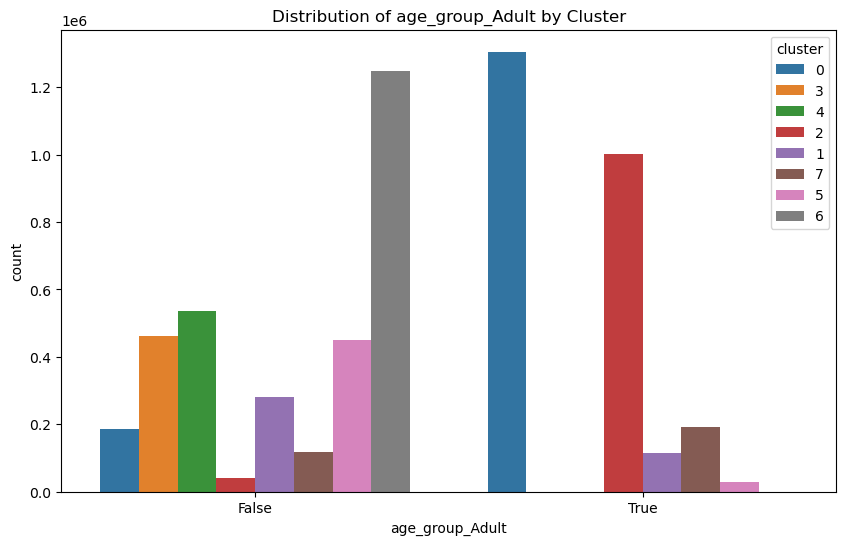

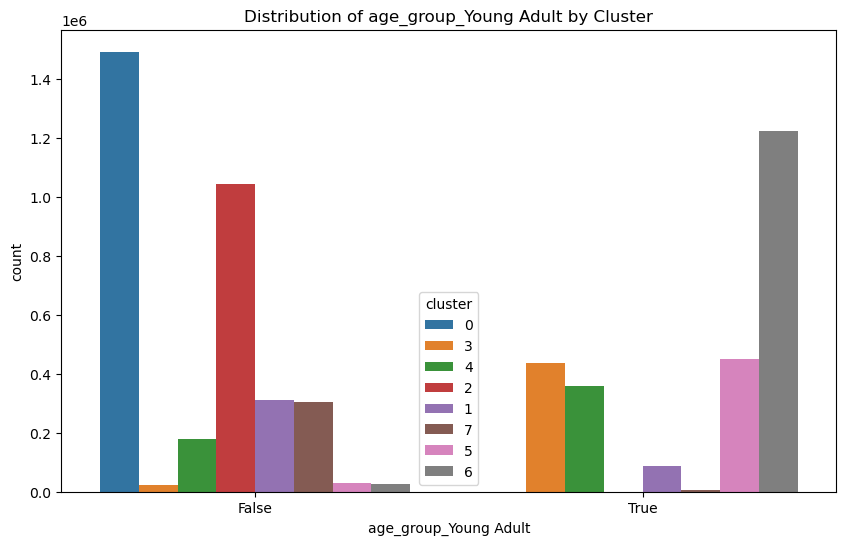

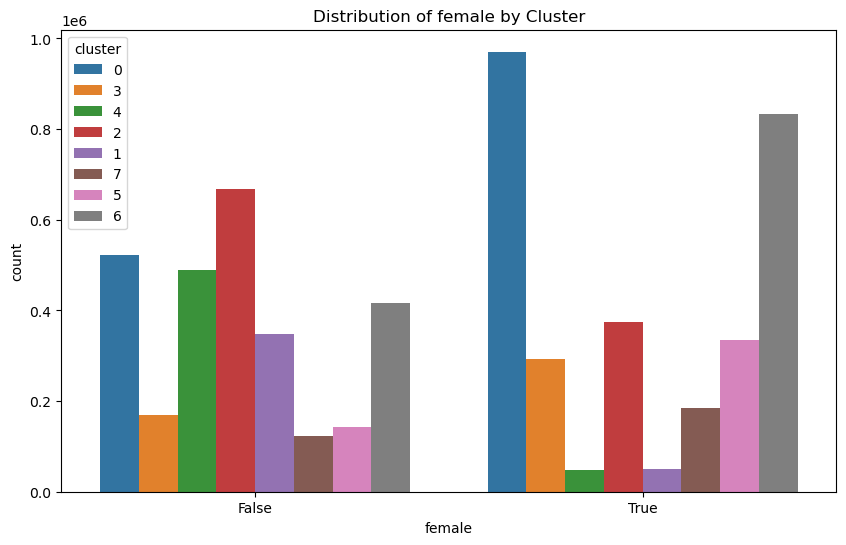

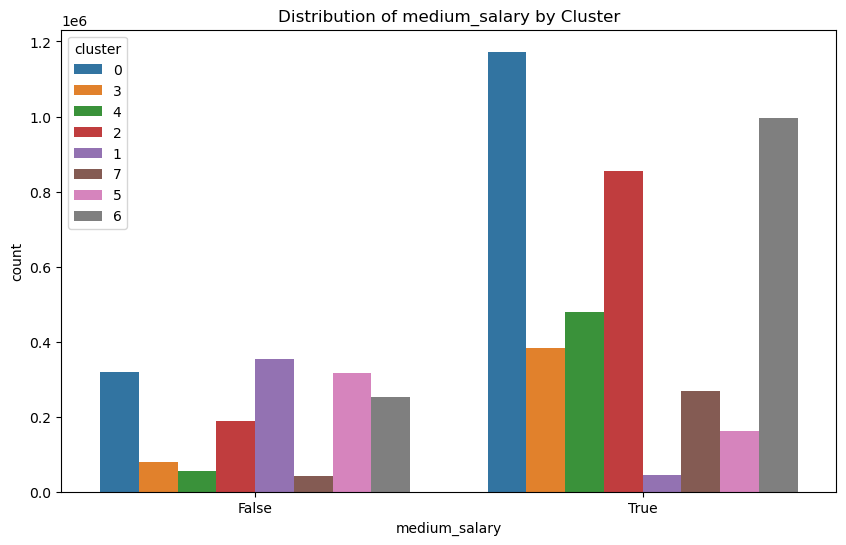

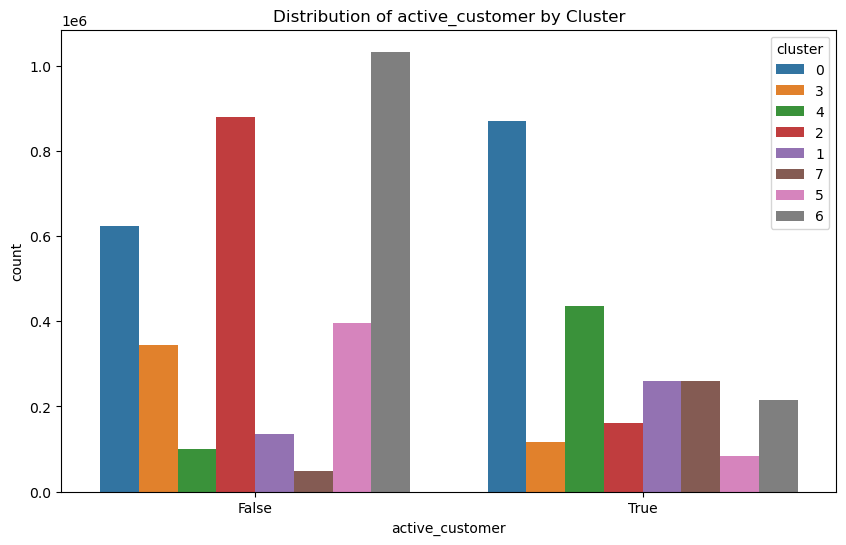

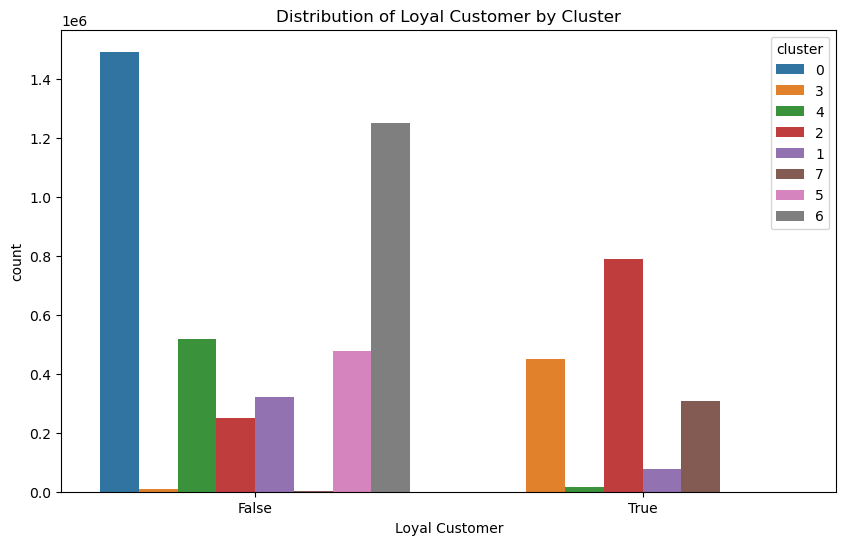

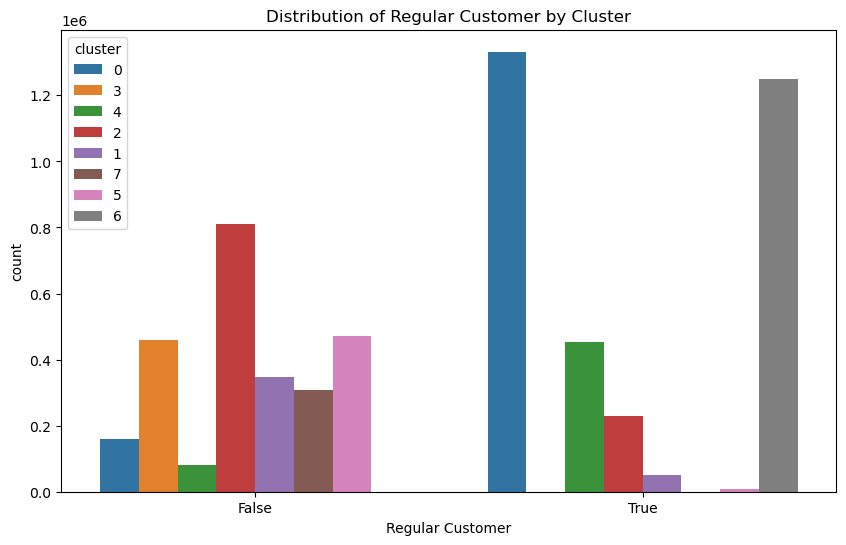

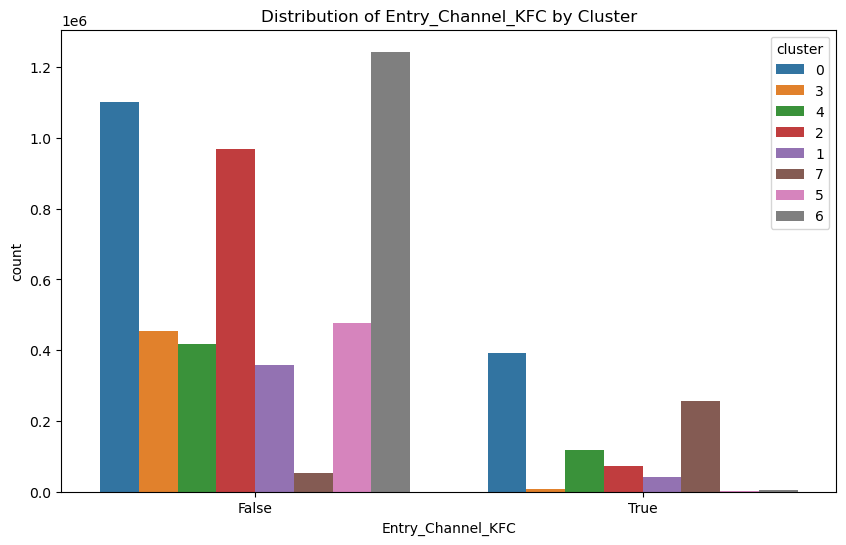

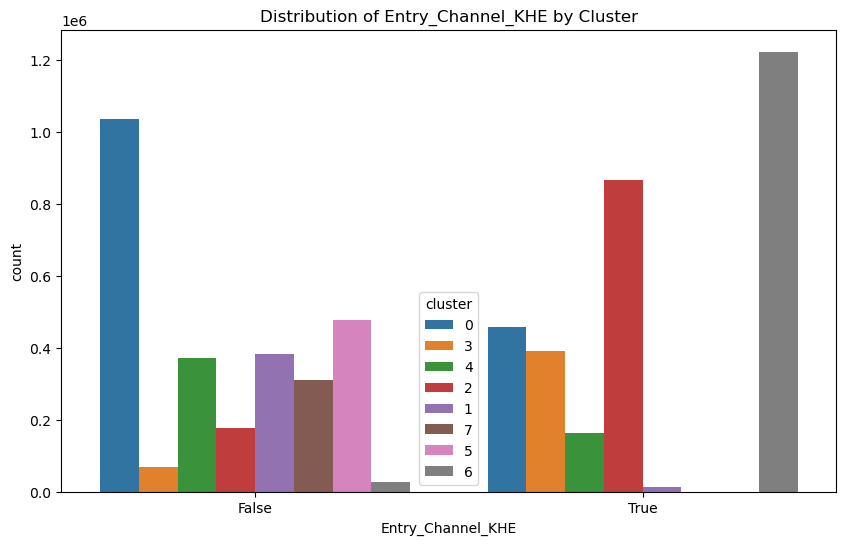

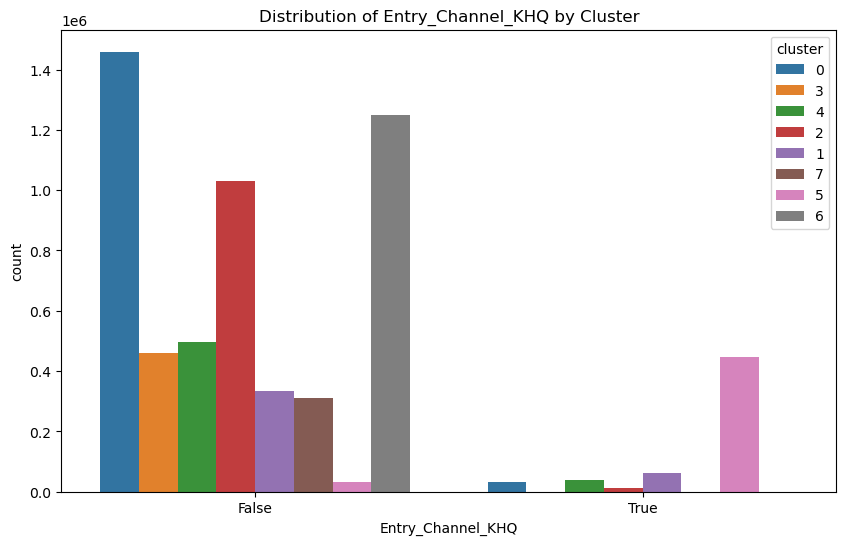

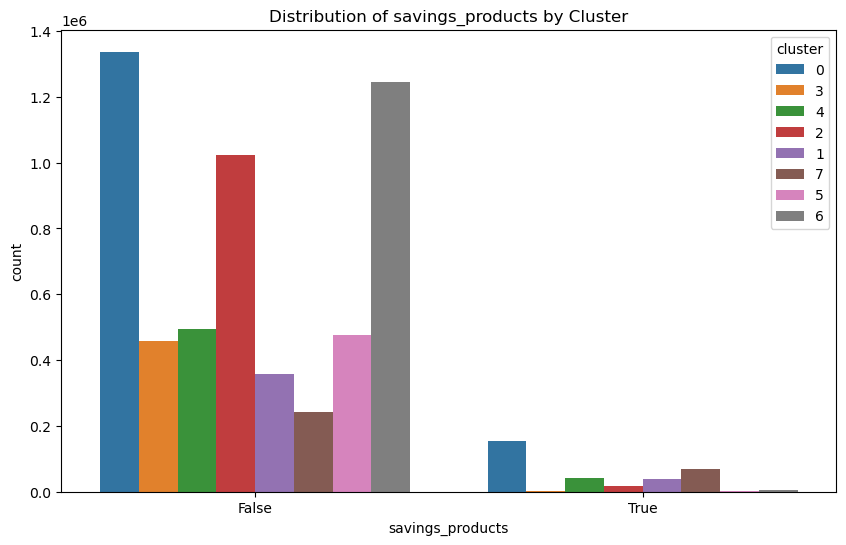

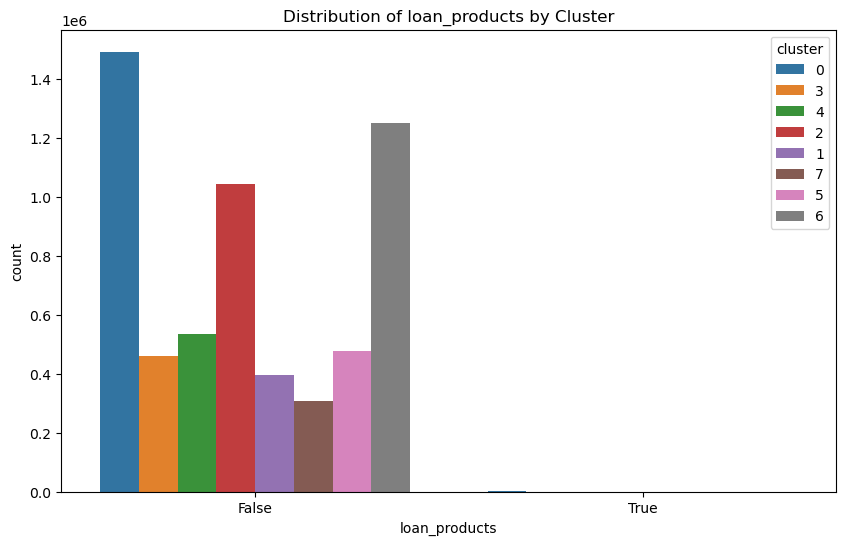

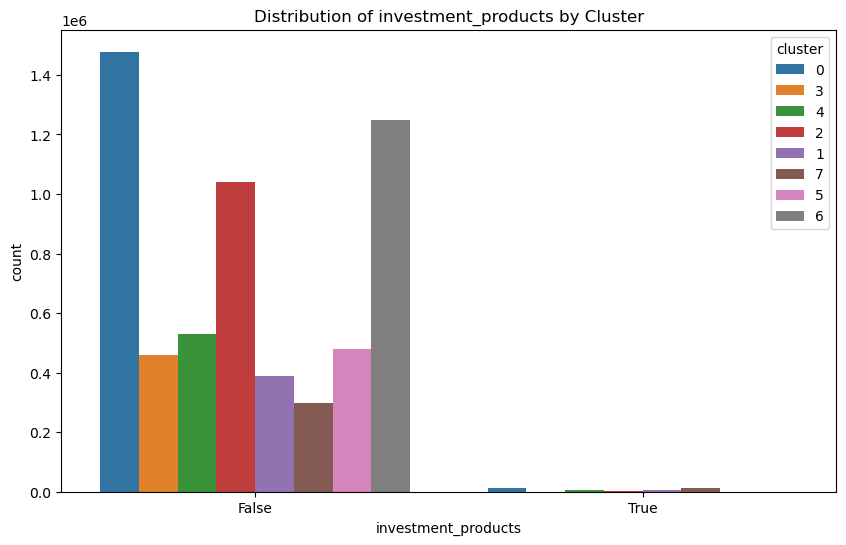

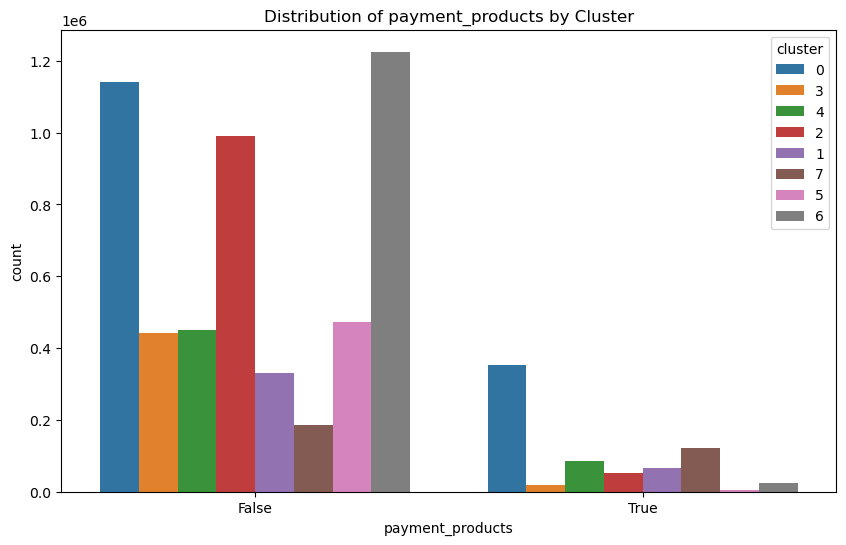

In [30]:
# Visualization
# For categorical features
# Ensure the 'cluster' column is of type string
df['cluster'] = df['cluster'].astype(str)

# Visualization
for feature in features_to_cluster:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='cluster', data=df)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()

**Interpretation of plots**

**Entry Channels (KHE, KFC):**

- Certain entry channels are more associated with specific clusters, suggesting that the way customers are acquired or choose to interact with the company can be indicative of their cluster grouping.

- KFC: associated with cluster 0,7
- KHE: associated with cluster 2,6,0,3
- KHQ: associated with cluster 5

**Regular and Loyal Customers:**

- There is a visible distinction in the distribution of regular and loyal customers across clusters. Some clusters have a higher proportion of loyal customers, while others are predominantly non-regular or non-loyal customers.

- Regular customers: associated with cluster 0,4,6
- Loyal customers: associated with cluster 3,2,7

**Active Customers:**

- Active customer status also varies significantly across clusters, which could reflect the engagement level or recent activity of customers within each cluster.

- Active customers: associated with cluster 0,4

**Product Holdings (Savings, Loan, Investment, Payment Products):**

- The distribution of product holdings such as savings products, loan products, investment products, and payment products suggests that some clusters are more product-focused than others.

- Savings products: associated with cluster 0
- Loan products: not associated with any cluster in particular
- Investment products: not associated with any cluster in particular
- Payment products: associated with cluster 0

**Demographics (Age Group, Gender):**

- Demographic distributions such as age group (adult, young adult) and gender (female) also show variability across clusters, implying that certain age groups or genders might be more prevalent in specific clusters.

- Adults: associated with cluster 0,2
- Young Adults: associated with cluster 3,4,5,6
- Female: associated with cluster 0,6,3,2,5
- Male: associated with 0,4,2,6

- Salary: associated with 0,2,6

By analyzing these plots, we can conclude that the clusters have distinct characteristics and likely represent different customer segments with unique behaviors and preferences. The visualizations support a segmented approach to customer relationship management, marketing strategies, and product offerings.



Now, to compare these clusters with other demographics or behaviors not included in X, we select a column that wasn't used for clustering. Let's say we want to check how the distribution of a variable age or region which was not included in clustering behaves across the different clusters:

In [31]:
# This is an example with 'age' and 'region' columns
cross_tab_highsalary = pd.crosstab(df['high_salary'], df['cluster'])
cross_tab_lowsalary = pd.crosstab(df['low_salary'], df['cluster'])
cross_tab_newcustomer = pd.crosstab(df['New Customer'], df['cluster'])
cross_tab_segment = pd.crosstab(df['03 - UNIVERSITARIO'], df['cluster'])
cross_tab_age = pd.crosstab(df['age_group_Middle-Aged'], df['cluster'])
cross_tab_products = pd.crosstab(df['em_account'], df['cluster'])



print(cross_tab_highsalary)
print(cross_tab_lowsalary)
print(cross_tab_newcustomer)
print(cross_tab_segment)
print(cross_tab_age)
print(cross_tab_products)

cluster            0       1        2       3       4       5        6       7
high_salary                                                                   
False        1479435  388360  1031059  456193  531931  474987  1235972  306216
True           12702    8462    10692    4420    3200    2789    12787    2773
cluster           0       1        2       3       4       5        6       7
low_salary                                                                   
False       1483537  393497  1035508  458342  533739  475989  1240975  308102
True           8600    3325     6243    2271    1392    1787     7784     887
cluster             0       1        2       3       4       5        6  \
New Customer                                                              
False         1332038  124985  1020644  450866  470938    6923  1248759   
True           160099  271837    21107    9747   64193  470853        0   

cluster            7  
New Customer          
False         307498  
Tr

To interpret this, we'll be looking at how each group is spread across clusters. If certain  are predominantly in specific clusters, that gives us insight into the cluster's distribution. The same goes for any other variable.

It's often useful to normalize these cross-tabulations to get proportions instead of raw counts, which can be done like so:

In [32]:
# Normalizing  to see the distribution of age within each cluster
cross_tab_highsalary_norm = cross_tab_highsalary.div(cross_tab_highsalary.sum(0), axis=1)
print(cross_tab_highsalary_norm)

cluster             0         1         2         3        4         5  \
high_salary                                                              
False        0.991487  0.978676  0.989737  0.990404  0.99402  0.994163   
True         0.008513  0.021324  0.010263  0.009596  0.00598  0.005837   

cluster            6         7  
high_salary                     
False        0.98976  0.991026  
True         0.01024  0.008974  


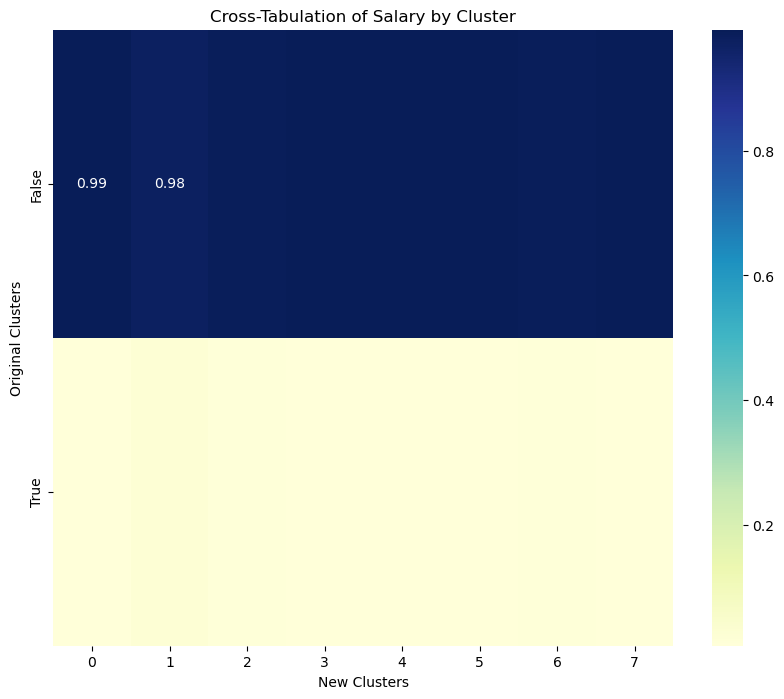

In [33]:
# Create a heatmap of the cross-tabulation
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab_highsalary_norm, annot=True, cmap="YlGnBu") 
plt.title('Cross-Tabulation of Salary by Cluster')
plt.xlabel('New Clusters')
plt.ylabel('Original Clusters')
plt.show()

In [34]:
# Normalizing  to see the distribution of clusters within each age group
cross_tab_lowsalary_norm = cross_tab_lowsalary.div(cross_tab_lowsalary.sum(1), axis=0)
print(cross_tab_lowsalary_norm)


cluster            0         1         2         3         4         5  \
low_salary                                                               
False       0.250188  0.066360  0.174631  0.077296  0.090011  0.080272   
True        0.266345  0.102976  0.193348  0.070334  0.043111  0.055344   

cluster            6         7  
low_salary                      
False       0.209282  0.051959  
True        0.241073  0.027471  


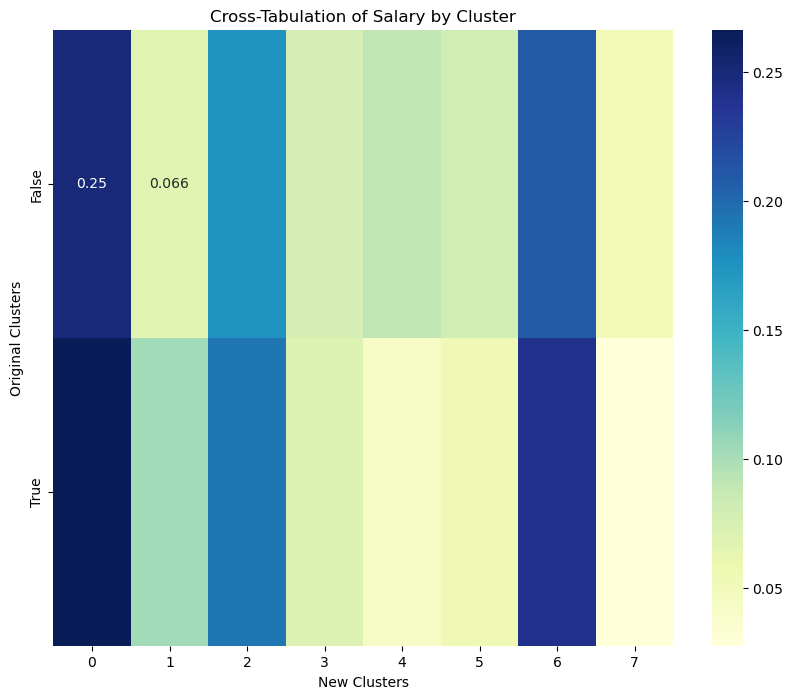

In [35]:
# Create a heatmap of the cross-tabulation
plt.figure(figsize=(10, 8)) 
sns.heatmap(cross_tab_lowsalary_norm, annot=True, cmap="YlGnBu") 
plt.title('Cross-Tabulation of Salary by Cluster')
plt.xlabel('New Clusters')
plt.ylabel('Original Clusters')
plt.show()

In [36]:
# Normalizing to see the distribution of clusters within each age group
cross_tab_newcustomer_norm = cross_tab_newcustomer.div(cross_tab_newcustomer.sum(1), axis=0)
print(cross_tab_newcustomer_norm)

cluster              0         1         2         3         4         5  \
New Customer                                                               
False         0.268413  0.025185  0.205665  0.090852  0.094896  0.001395   
True          0.160207  0.272020  0.021121  0.009754  0.064236  0.471170   

cluster              6         7  
New Customer                      
False         0.251631  0.061962  
True          0.000000  0.001492  


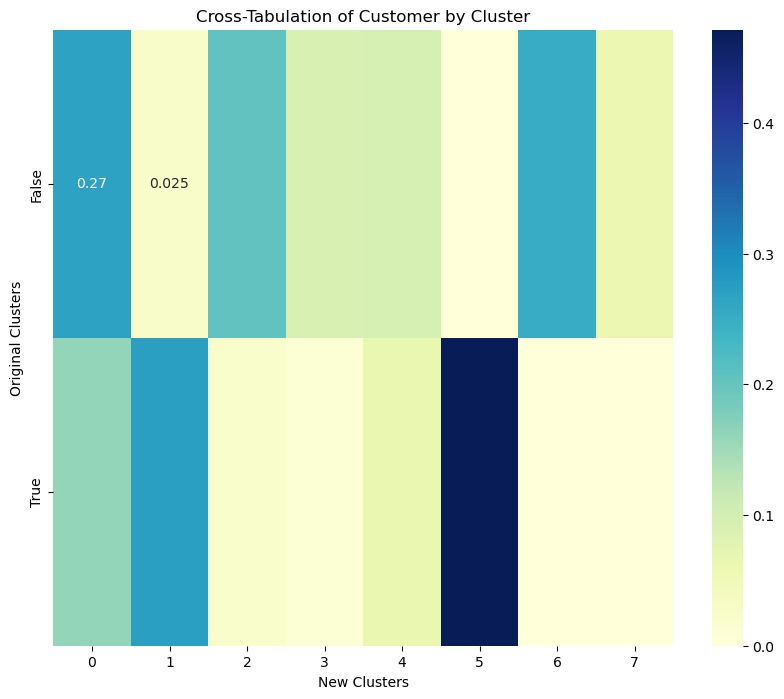

In [37]:
# Create a heatmap of the cross-tabulation
plt.figure(figsize=(10, 8)) 
sns.heatmap(cross_tab_newcustomer_norm, annot=True, cmap="YlGnBu") 
plt.title('Cross-Tabulation of Customer by Cluster')
plt.xlabel('New Clusters')
plt.ylabel('Original Clusters')
plt.show()

In [38]:
# Normalizing to see the distribution of clusters within each age group
cross_tab_segment_norm = cross_tab_segment.div(cross_tab_segment.sum(1), axis=0)
print(cross_tab_segment_norm)

cluster                    0         1         2         3        4         5  \
03 - UNIVERSITARIO                                                              
False               0.439240  0.151387  0.093427  0.021053  0.12902  0.018172   
True                0.150376  0.021713  0.217716  0.106973  0.06900  0.112896   

cluster                    6         7  
03 - UNIVERSITARIO                      
False               0.015448  0.132254  
True                0.312019  0.009307  


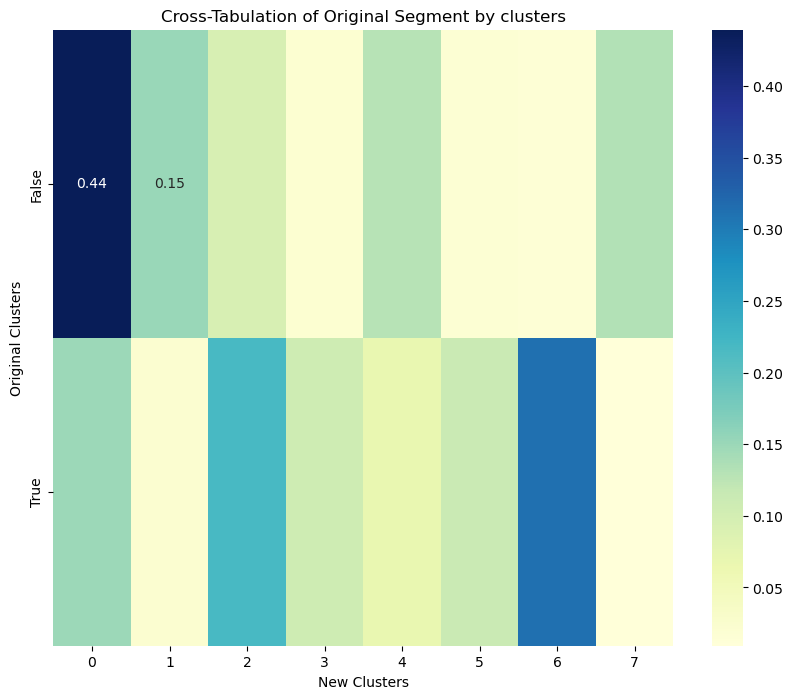

In [39]:
# Create a heatmap of the cross-tabulation
plt.figure(figsize=(10, 8)) 
sns.heatmap(cross_tab_segment_norm, annot=True, cmap="YlGnBu") 
plt.title('Cross-Tabulation of Original Segment by clusters')
plt.xlabel('New Clusters')
plt.ylabel('Original Clusters')
plt.show()

In [40]:
# Normalizing to see the distribution of clusters within each age group
cross_tab_age_norm = cross_tab_age.div(cross_tab_age.sum(1), axis=0)
print(cross_tab_age_norm)

cluster                       0         1         2         3         4  \
age_group_Middle-Aged                                                     
False                  0.252099  0.044615  0.188741  0.082616  0.072055   
True                   0.234395  0.257677  0.052729  0.030594  0.243938   

cluster                       5         6         7  
age_group_Middle-Aged                                
False                  0.088985  0.229811  0.041079  
True                   0.003080  0.032154  0.145433  


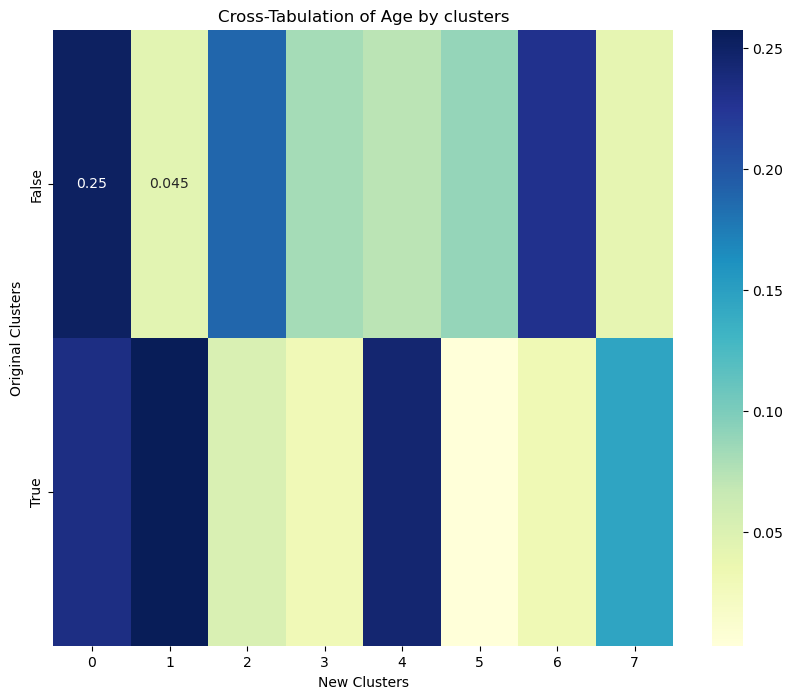

In [41]:
# Create a heatmap of the cross-tabulation
plt.figure(figsize=(10, 8)) 
sns.heatmap(cross_tab_age_norm, annot=True, cmap="YlGnBu") 
plt.title('Cross-Tabulation of Age by clusters')
plt.xlabel('New Clusters')
plt.ylabel('Original Clusters')
plt.show()

In [42]:
# Normalizing to see the distribution of clusters within each age group
cross_tab_products_norm = cross_tab_products.div(cross_tab_products.sum(1), axis=0)
print(cross_tab_products_norm)

cluster            0         1         2         3         4         5  \
em_account                                                               
False       0.311613  0.091188  0.130108  0.051035  0.085904  0.096154   
True        0.228142  0.057671  0.190835  0.086721  0.091148  0.074358   

cluster            6         7  
em_account                      
False       0.156000  0.077999  
True        0.228742  0.042382  


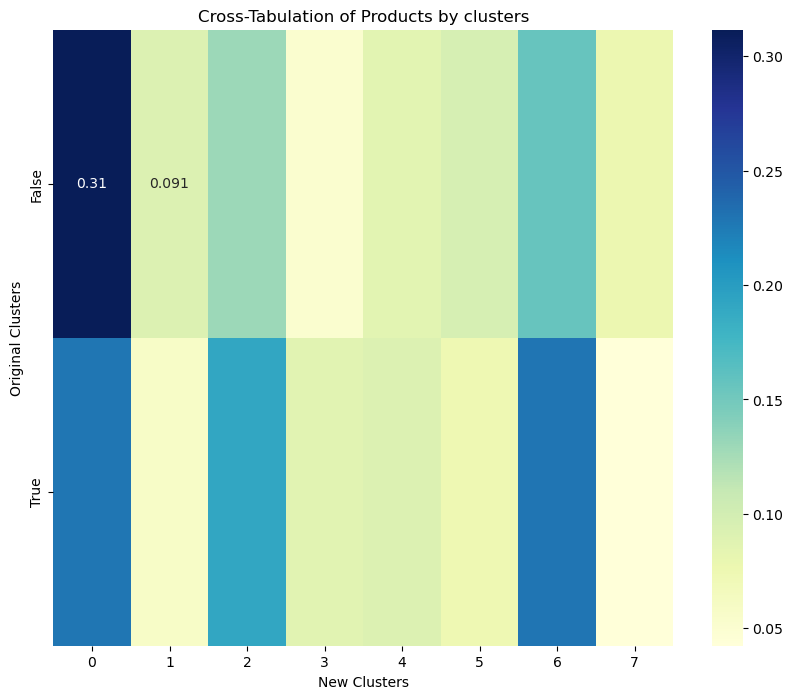

In [43]:
# Create a heatmap of the cross-tabulation
plt.figure(figsize=(10, 8)) 
sns.heatmap(cross_tab_products_norm, annot=True, cmap="YlGnBu") 
plt.title('Cross-Tabulation of Products by clusters')
plt.xlabel('New Clusters')
plt.ylabel('Original Clusters')
plt.show()

**Interpretation and Decision** 

Based on the cross-tabulation results, we can have a brief summary highlighting key characteristics for each cluster:

**High Salary Cross-Tabulation:**

- Across the clusters, high salary earners are a minority, generally below 1%, with Cluster 7 slightly leading at approximately 0.9%. This reaffirms that the high salary group does not represent the majority in any cluster.

**Low Salary Cross-Tabulation:***

- The data reveals a significant proportion of low salary earners in each cluster, with Cluster 7 having the smallest proportion at around 2.7% and Cluster 0 the largest at about 26.6%. This highlights that the customer base is predominantly comprised of individuals with lower salaries.

**New Customer Cross-Tabulation:**

- Clusters 5 and 3 have the highest proportions of new customers at approximately 47% and 9%, respectively, suggesting recent growth in these segments. In contrast, Clusters 6 and 7 have the lowest, with Cluster 6 having no new customers and Cluster 7 at about 0.15%.

**Segment Cross-Tabulation:**

- University students have a notably higher representation in Cluster 6 at around 31%, with Cluster 7 having the lowest at about 0.9%. This indicates targeted customer segments, with Cluster 6 potentially being an attractive market for student-related products and services.

**Age Group Cross-Tabulation:**

- Clusters 1 and 4 have the highest percentages of middle-aged customers, at approximately 25.8% and 24.4% respectively, signifying that these clusters may be more established in their careers and possibly more financially secure.

**Products Cross-Tabulation:**

- Clusters 6 and 2 have the highest percentages of 'em_account' holders, at approximately 22.9% and 19.1% respectively, indicating a strong engagement with the bank's products. Clusters 5 and 7 have the lowest, with Cluster 5 at around 7.4% and Cluster 7 at 4.2%, suggesting room for increased product uptake and engagement initiatives.






---

---

## Final Interpretation based on both crosstab and kmodes results

Combining all the information provided about customer clusters, we can synthesize a detailed profile for each cluster as follows:

**Cluster 0: Emerging Engagers**

- Entry Channels: A mix of KFC and KHE suggests varied acquisition strategies.
- Customer Type: A blend of regular customers, active engagement, and a mix of new and established relationships.
- Financial Profile: Dominated by low-salary earners but also associated with savings and payment product holdings.
- Demographics: Broad age group including adults and possibly young adults, but not specifically university students.
- Reflects the cluster's diversity and inclusivity of various age groups and financial backgrounds. Suggests their wide-ranging product interests.

**Cluster 1: Established Mid-Agers savers**

- Entry Channels: Moderate use of KHE indicates traditional engagement.
- Customer Type: Few new customers, indicating longer-term relationships.
- Financial Profile: Low salary earners similar to Cluster 0.
- Demographics: A slightly higher representation of middle-aged customers and a lower proportion of 'em_account' holders, implying stable financial habits.
- Emphasizes the stability and traditionalism of this cluster.These customers are likely a key demographic for the bank, with a consistent financial approach

**Cluster 2: Financially Engaged**

- Entry Channels: Considerable use of KHE shows established engagement channels.
- Customer Type: Few new customers suggest loyalty and established banking habits.
- Financial Profile: Not the highest but a notable percentage of high salary earners, implying financial stability.
- Demographics: A notable percentage of middle-aged customers, likely financially established.
- This cluster's mature and financially stable customer base. Suggests they have a long-standing relationship with the bank and are experienced in financial matters.

**Cluster 3: Emerging Customers**

- Entry Channels: Mostly associated with KHQ, indicating recent customer acquisition strategies.
- Customer Type: Significant new customers, implying a segment ripe for new relationships and loyalty building.
- Financial Profile: Balance of new engagements with potential for financial growth.
- Demographics: Less focus on university students, suggesting a recent shift away from this demographic.
- Suggests this cluster comprises newer customers to the bank

**Cluster 4: Balanced Costumers**

- Entry Channels: Use of KHE similar to Clusters 2 and 3.
- Customer Type: A balance of new and existing customers.
- Financial Profile: Moderate mix of salary levels and 'em_account' engagement.
- Demographics: Likely a diverse age group, possibly reflecting the balanced customer type.
- Reflects a balance in customer demographics and financial engagement. There is potential for growth and deeper engagement.

**Cluster 5: Growth Seekers**

- Entry Channels: Association with KHQ might reflect a digital or innovative acquisition approach.
- Customer Type: Possibly newer segments given the presence of university students.
- Financial Profile: Similar salary distribution to other clusters but with the lowest 'em_account' engagement, suggesting potential for growth.
- Demographics: Presence of university students and young adults indicates this cluster's potential for future development.
- Highlights the younger demographic and potential for growth. Suggests these customers may be open to trying new financial products and services.

**Cluster 6: Aspiring Diversifiers**

- Entry Channels: Diverse, not specified which could indicate a variety of acquisition strategies.
- Customer Type: Regular customers with a diversity of engagement levels.
- Financial Profile: Higher representation of low salary earners and a need for financial product education and engagement.
- Demographics: Broader age range with a lean towards middle-aged individuals, not specifically targeting students.
- Indicates a customer group aiming to broaden their financial portfolio. Potential desire to improve their financial standing.

**Cluster 7: Premium Innovators**

- Entry Channels: Notable use of KFC with some KHE users, indicating a mix of traditional and innovative acquisition approaches.
- Customer Type: Loyal customers indicating strong retention and value in the cluster.
- Financial Profile: The highest percentage of high salary earners, implying a segment with significant financial clout and engagement.
- Demographics: Significant number of university students and middle-aged customers, suggesting a range of product needs and financial sophistication.
- Suggests a segment with significant financial resources and a propensity towards adopting new banking technologies or products.

---

- These cluster profiles offer a comprehensive understanding of the customer base, with each cluster showing distinct patterns in terms of demographics, financial status, product preferences, and engagement levels. EasyMoney can use this detailed segmentation to tailor its marketing strategies, product offers, and customer service approaches to meet the unique needs of each customer group.

In [55]:
df['cluster'].value_counts()

cluster
0    1492137
6    1248759
2    1041751
4     535131
5     477776
3     460613
1     396822
7     308989
Name: count, dtype: int64

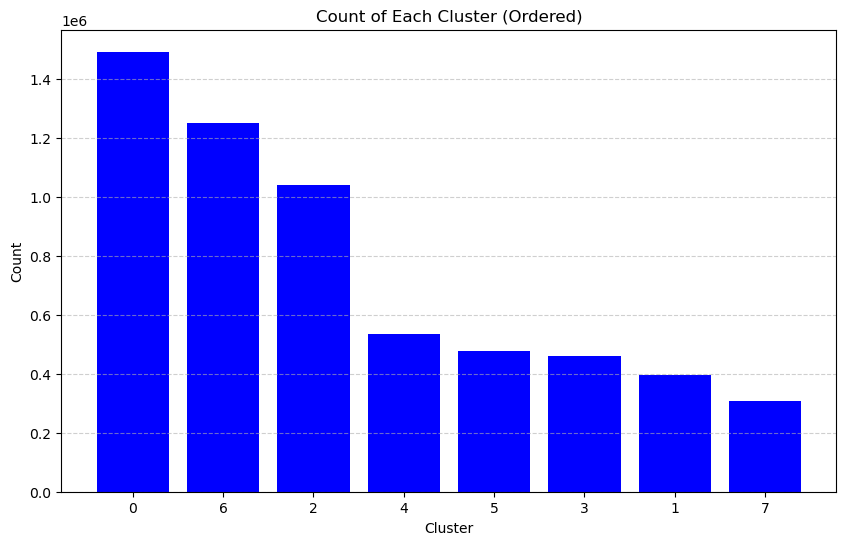

In [60]:
# Bar chart of df['cluster'].value_counts
cluster_counts = df['cluster'].value_counts()
# Sorting the cluster counts in descending order
cluster_counts_sorted = cluster_counts.sort_values(ascending=False)
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(cluster_counts_sorted)), cluster_counts_sorted.values, color='blue')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Count of Each Cluster (Ordered)')
plt.xticks(range(len(cluster_counts_sorted)), cluster_counts_sorted.index)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [51]:
df.head()

,pk_cid,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,payroll_pension_unknown,payroll_account,...,medium_salary,short_term_deposit,pension,savings_products,loan_products,investment_products,payment_products,cluster_7,cluster_8,cluster
2018-01-28,1000028,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,0,0,0
2018-02-28,1000028,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,0,0,0
2018-03-28,1000028,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,0,0,0
2018-04-28,1000028,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,0,0,0
2018-05-28,1000028,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,0,0,0


In [52]:
# save the file to csv dropping columns cluster_7 and cluster_8
df_final = df.drop(['cluster_7', 'cluster_8'], axis=1)
df_final.head()


,pk_cid,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,payroll_pension_unknown,payroll_account,...,high_salary,low_salary,medium_salary,short_term_deposit,pension,savings_products,loan_products,investment_products,payment_products,cluster
2018-01-28,1000028,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,0
2018-02-28,1000028,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,0
2018-03-28,1000028,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,0
2018-04-28,1000028,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,0
2018-05-28,1000028,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,0


In [54]:
# Save to csv file
df_final.to_csv('EasyMoney_Segmentation_Final.csv')

In [70]:
# import data dictionary
data_dictionary = pd.read_csv('/Users/albertooutumurobueno/Desktop/NUCLIO DIGITAL SCHOOL/CAPSTONE PROJECT/Clustering/Data_Dictionary.csv')
data_dictionary.head()


,Name,Table,Description
0,active_customer,commercial_activity,Client activity indicator in our application\r
1,entry_channel,commercial_activity,Customer acquisition channel\r
2,entry_date,commercial_activity,Date on which first easyMoney contract was sig...
3,segment,commercial_activity,Customer business segment
4,age,sociodemographic,Customer age


In [ ]:
# Define a new row as a dictionary
new_row = {
    'Name': 'cluster',
    'Table': 'EasyMoney_Segmentation',  
    'Description': 'Customer segmentation identifier'  
}

next_index = data_dictionary.index.max() + 1

# Append the new row to the DataFrame
data_dictionary.loc[next_index] = new_row




In [73]:
# Display the updated DataFrame
data_dictionary

,Name,Table,Description
0,active_customer,commercial_activity,Client activity indicator in our application\r
1,entry_channel,commercial_activity,Customer acquisition channel\r
2,entry_date,commercial_activity,Date on which first easyMoney contract was sig...
3,segment,commercial_activity,Customer business segment
4,age,sociodemographic,Customer age
5,country_id,sociodemographic,Country of residence of the client
6,deceased,sociodemographic,Deceased index. N/S
7,gender,sociodemographic,Gender
8,region_code,sociodemographic,Customer's province of residence (for ES)
9,salary,sociodemographic,Household gross income


In [74]:
# Save new data_dictionary
data_dictionary.to_csv('Data_Dictionary_Updated_With_Cluster.csv')

In [79]:
import pandas as pd

# Assuming 'df' is your DataFrame with the clustering information
# First, make sure the dates are in datetime format
df['entry_date'] = pd.to_datetime(df['entry_date'])

# Sort the DataFrame by customer ID and then by ingestion date
df_sorted = df.sort_values(by=['pk_cid'])

# Now, you can analyze the transitions of a customer's clusters over time
# For example, let's look at customer 919
customer_919_history = df_sorted[df_sorted['pk_cid'] == 919]

# This will give you a DataFrame containing the history of customer 919's cluster assignments
print(customer_919_history)


Empty DataFrame
Columns: [pk_cid, loans, mortgage, funds, securities, long_term_deposit, credit_card, payroll, payroll_pension_unknown, payroll_account, emc_account, debit_card, em_account_p, em_account, entry_date, active_customer, segment, region_code, deceased, New Monthly Subscribers, prev_partition, Loyal Customer, New Customer, Regular Customer, Entry_Channel_KAT, Entry_Channel_KFC, Entry_Channel_KHE, Entry_Channel_KHK, Entry_Channel_KHQ, Entry_Channel_Others, Entry_Channel_Unknown, 01 - TOP, 02 - PARTICULARES, 03 - UNIVERSITARIO, Unknown Segment, region_10, region_11, region_12, region_13, region_14, region_15, region_18, region_2, region_21, region_28, region_29, region_3, region_30, region_33, region_35, region_36, region_37, region_39, region_41, region_45, region_46, region_47, region_50, region_6, region_7, region_8, region_Others, female, age_group_Adult, age_group_Middle-Aged, age_group_Senior, age_group_Young Adult, Unknown_salary, high_salary, low_salary, medium_salary,

In [80]:
# Define your customers of interest
customers_of_interest = [919, 28191, 31825, 43725, 44949, 45483, 61484, 74764,
                         76726, 79623, 1546932, 1547120, 1547314, 1547452, 1547572, 
                         1547614, 1547783, 1547882, 1547893, 1548025]

# Filter the DataFrame for these customers
customers_history = df_sorted[df_sorted['pk_cid'].isin(customers_of_interest)]

# Now customers_history contains the clustering history of your customers of interest


In [85]:
customers_history['cluster']

cluster
7    78
3    27
1    19
5    16
2     9
0     1
Name: count, dtype: int64

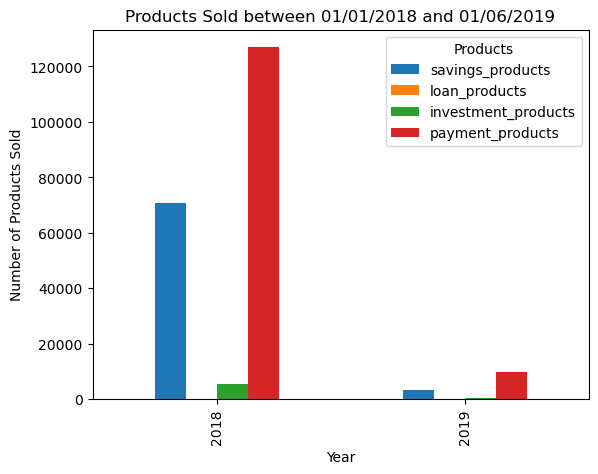

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Sample data generation (You should replace this with your actual data)
# Slide 1: Sales Board

# 1. Chart of products sold in 2018 and 2019:
# Filter the dataframe for 2018 and 2019 data
# Assuming 'df' is your DataFrame and it has an 'entry_date' column in datetime format
# First, make sure to filter out the data for the dates between 01/01/2018 and 01/06/2019

df_2018_2019 = df[(df['entry_date'] >= '2018-01-01') & (df['entry_date'] <= '2019-06-01')]

# Group the data by year and sum the product counts
# The correct method to sum after groupby is to call the sum function directly, not using call parentheses
products_sold = df_2018_2019.groupby(df_2018_2019['entry_date'].dt.year)[['savings_products', 'loan_products', 'investment_products', 'payment_products']].sum()

# Create a bar chart for each product type
products_sold.plot(kind='bar', stacked=False)  # stacked=True if you want a stacked bar chart
plt.xlabel('Year')
plt.ylabel('Number of Products Sold')
plt.title('Products Sold between 01/01/2018 and 01/06/2019')
plt.legend(title='Products')
plt.show()




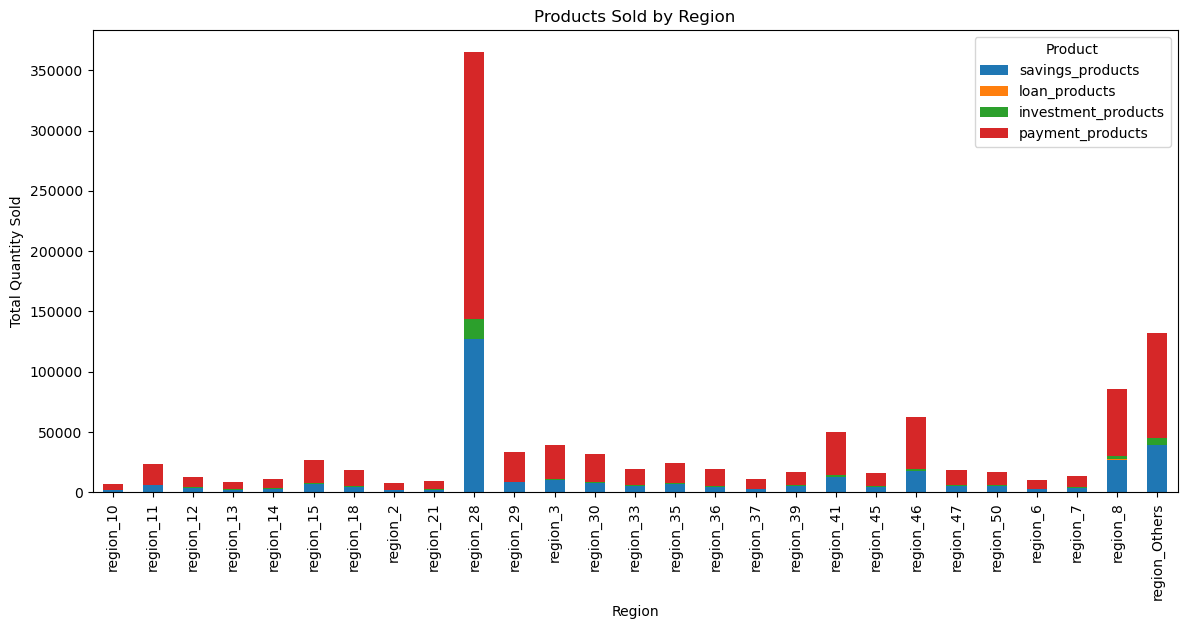

In [97]:
# Assuming 'region_code' is the correct column name for the regions in your DataFrame
# and 'savings_products', 'loan_products', 'investment_products', 'payment_products'
# are the columns for each product's quantity.

# Group the data by top ten 'region_code' and sum up the quantities for each product.

region_sales = df.groupby('region_code', as_index=False)[['savings_products', 'loan_products', 'investment_products', 'payment_products']].sum()

# Now, let's plot the bar chart as a stacked bar chart
region_sales.set_index('region_code', inplace=True)
region_sales.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Products Sold by Region')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Region')
plt.legend(title='Product')
plt.show()



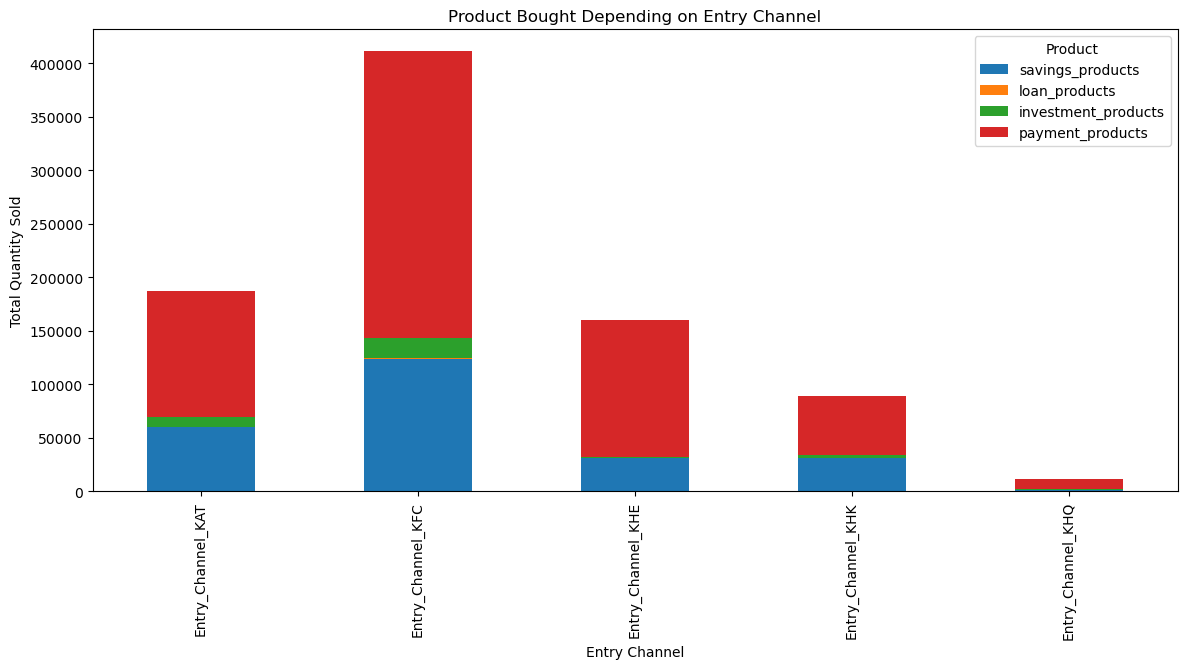

In [108]:
# Assuming that 'Entry_Channel_KAT', 'Entry_Channel_KFC', etc., are boolean columns indicating the channel through which the product was bought.
# First, we'll melt these into a single 'entry_channel' column with product counts.

# Prepare data for melting
id_vars = df.columns.difference(['Entry_Channel_KAT', 'Entry_Channel_KFC', 'Entry_Channel_KHE', 'Entry_Channel_KHK', 'Entry_Channel_KHQ']).tolist()
value_vars = ['Entry_Channel_KAT', 'Entry_Channel_KFC', 'Entry_Channel_KHE', 'Entry_Channel_KHK', 'Entry_Channel_KHQ']

# Melt the DataFrame
df_melted = df.melt(id_vars=id_vars, value_vars=value_vars, var_name='entry_channel', value_name='channel_active')

# Filter only active channels
df_melted = df_melted[df_melted['channel_active'] == True]

# Drop the 'channel_active' column as it's no longer needed
df_melted.drop('channel_active', axis=1, inplace=True)

# Now, group by the new 'entry_channel' column and sum up the quantities for each product
channel_sales = df_melted.groupby('entry_channel')[['savings_products', 'loan_products', 'investment_products', 'payment_products']].sum()

# Plot the stacked bar chart
channel_sales.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Product Bought Depending on Entry Channel')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Entry Channel')
plt.legend(title='Product')
plt.show()




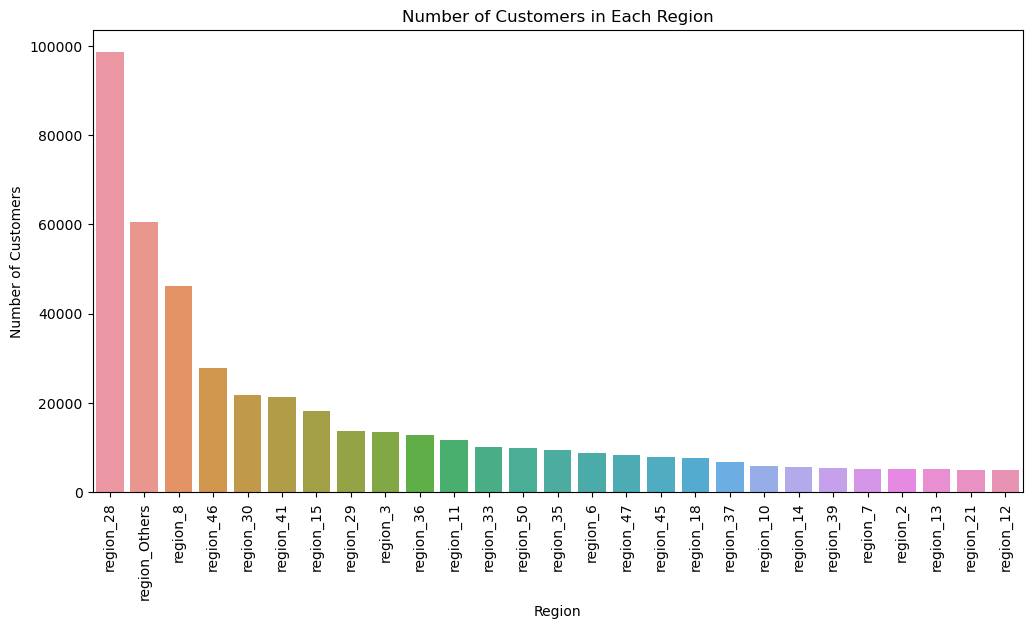

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df has columns 'region' for region code and 'customer_id' to uniquely identify customers.
# The DataFrame df also contains a 'salary_type' column and boolean columns for each product type.

# 1. Customer Map Visualization (as a bar chart, since there's no geographical data provided)
customers_per_region = df.groupby('region_code')['pk_cid'].nunique().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=customers_per_region.index, y=customers_per_region.values)
plt.title('Number of Customers in Each Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
plt.xticks(rotation=90)
plt.show()




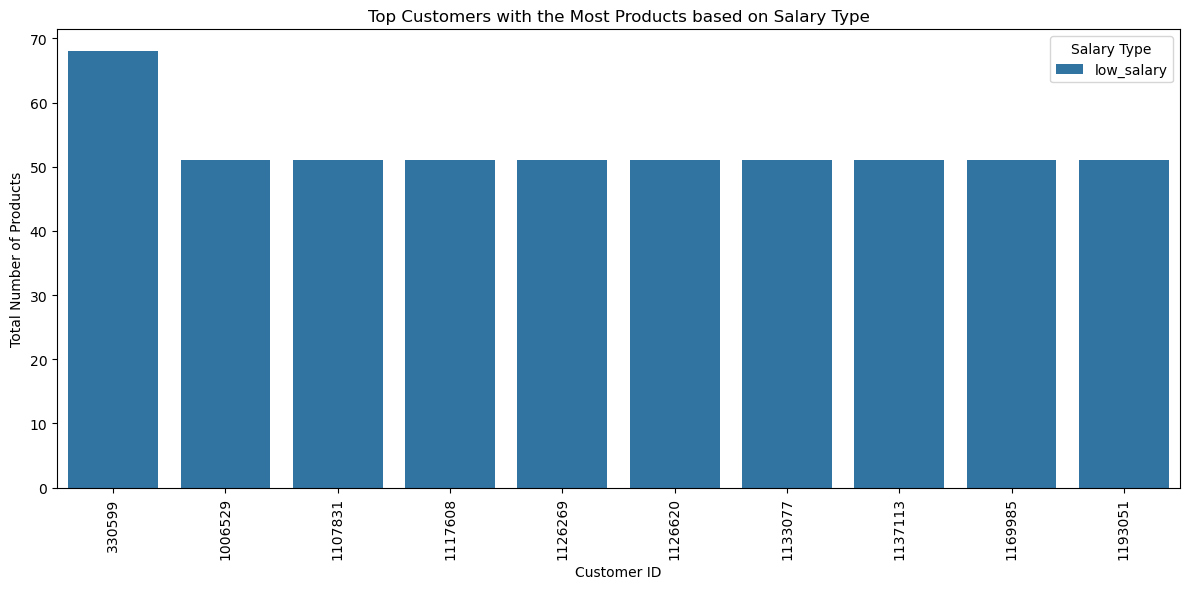

In [124]:
import numpy as np



# Replace these column names with your actual DataFrame columns for different salary types
salary_vars = ['low_salary', 'medium_salary', 'high_salary']  

# All other columns that are not related to salary types
id_vars = df.columns.difference(salary_vars).tolist()

# Melt the DataFrame for salary categories
df_melted = df.melt(id_vars=id_vars, value_vars=salary_vars, var_name='salary_type', value_name='salary_active')

# Filter only active salary types
df_melted = df_melted[df_melted['salary_active'] == True]

# Drop the 'salary_active' column as it's no longer needed
df_melted.drop('salary_active', axis=1, inplace=True)



# First, add a unique identifier to your melted dataframe
df_melted['unique_id'] = range(1, len(df_melted) + 1)



# Ensure these are the correct product columns in your df
product_columns = ['savings_products', 'loan_products', 'investment_products', 'payment_products']  
df['total_products'] = df[product_columns].sum(axis=1)

# Make sure you have a 'salary_type' column in df, which categorizes each customer into a salary type
# Assuming salary_type is already a column in df, else you need to create this column based on your specific conditions
# Now group by customer ID and salary type, and calculate the total products
top_customers = df.groupby(['pk_cid', 'salary_type'])['total_products'].sum().reset_index()

# Sort the results and get the top 10 customers
top_customers = top_customers.sort_values(by='total_products', ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='pk_cid', y='total_products', hue='salary_type', data=top_customers)
plt.title('Top Customers with the Most Products based on Salary Type')
plt.ylabel('Total Number of Products')
plt.xlabel('Customer ID')
plt.xticks(rotation=90)
plt.legend(title='Salary Type')
plt.tight_layout()
plt.show()



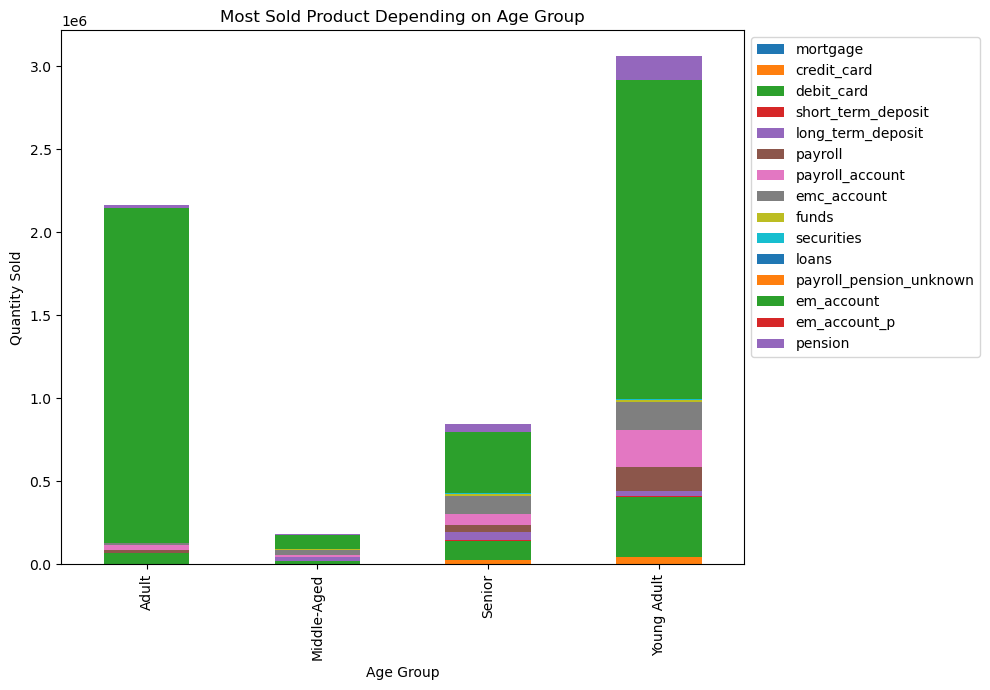

In [130]:
# Human-readable labels for the age groups
age_group_labels = ['Adult', 'Middle-Aged', 'Senior', 'Young Adult']

# Create a mapping from the 'True/False' columns to the human-readable labels
age_group_mapping = {
    'age_group_Adult': 'Adult',
    'age_group_Middle-Aged': 'Middle-Aged',
    'age_group_Senior': 'Senior',
    'age_group_Young Adult': 'Young Adult'
}

# Replace the 'True/False' column names with the human-readable labels
df_renamed = df.rename(columns=age_group_mapping)

# Group the data by the renamed columns and sum up the product quantities
product_age_group_sales = df_renamed.groupby(list(age_group_mapping.values()))[product_columns].sum()

# Plotting the stacked bar chart
ax = product_age_group_sales.plot(kind='bar', stacked=True, figsize=(10, 7))

# Move the legend outside the plot on the upper left
ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# Set the title and labels
plt.title('Most Sold Product Depending on Age Group')
plt.xlabel('Age Group')
plt.ylabel('Quantity Sold')

# Set human-readable tick labels on the x-axis
ax.set_xticklabels(age_group_labels)

# Ensure the plot layout fits everything
plt.tight_layout()

# Show the plot
plt.show()
